In [ ]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
import pandas as pd
import numpy as np
import os
import glob
indices = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'modules'

In [4]:
#surface_tensions = read_and_write.read_surface_tension_dict()
surface_tensions_95 = read_and_write.read_surface_tension_dict(file_path="/home/haaaaron/SUN_twist_python_analysis/notebooks/Results/Surface_tension_smeared/beta-10.95-su4-80-80-100-6.txt")
surface_tensions_90 = read_and_write.read_surface_tension_dict(file_path="/home/haaaaron/SUN_twist_python_analysis/notebooks/Results/Surface_tension_smeared/beta-10.90-su4-80-80-100-6.txt")
surface_tensions_85 = read_and_write.read_surface_tension_dict(file_path="/home/haaaaron/SUN_twist_python_analysis/notebooks/Results/Surface_tension_smeared/beta-10.85-su4-80-80-100-6.txt")
surface_tensions_8 = read_and_write.read_surface_tension_dict(file_path="/home/haaaaron/SUN_twist_python_analysis/notebooks/Results/Surface_tension_smeared/beta-10.8-su4-80-80-100-6.txt")

# Join the two dictionaries
surface_tensions_combined = surface_tensions_95.copy()
surface_tensions_combined.update(surface_tensions_90)
surface_tensions_combined.update(surface_tensions_85)
surface_tensions_combined.update(surface_tensions_8)

NameError: name 'read_and_write' is not defined

In [3]:
keys = list(surface_tensions_combined)
for i,k in enumerate(keys):
    print(k,"index:",i)

beta-10.95-twist-2 index: 0
beta-10.95-twist-1 index: 1
beta-10.9-twist-2 index: 2
beta-10.9-twist-1 index: 3
beta-10.85-twist-1 index: 4
beta-10.85-twist-2 index: 5
beta-10.8-twist-1 index: 6
beta-10.8-twist-2 index: 7


4
10.95 {'2': {'smearing': ['0', '5', '10', '20', '30', '40'], 'linear': [(347398.1012601468, 149759.31991188903), (7.8168541864024075, 0.29165284593507323), (3.0253493381382337, 0.11641856554229973), (2.535272254136045, 0.0989642184087497), (2.557880816842822, 0.09302427024348409), (2.6134518970825136, 0.0923610735481575)]}, '1': {'smearing': ['0', '5', '10', '20', '30', '40'], 'linear': [(330649.1051530528, 382516.4716902774), (7.949928159899338, 0.158175267740143), (2.75713209068161, 0.031322941644441014), (1.9543007986157248, 0.017913875306094028), (1.9227149613351093, 0.014777134278487586), (1.971838753579806, 0.015264142436220702)]}}
[[1.29711190e+00 1.88578739e+04 5.43359224e+04 7.66479610e+04
  7.79018842e+04 7.59613143e+04]
 [2.73635979e-05 4.15765004e-02 1.10576220e-01 1.53674167e-01
  1.54872729e-01 1.51058987e-01]
 [1.05908568e-05 1.64856059e-02 4.40262175e-02 6.12371923e-02
  6.17448739e-02 6.02233831e-02]
 [8.87538350e-06 1.39722469e-02 3.73831765e-02 5.20166545e-02
  5.2

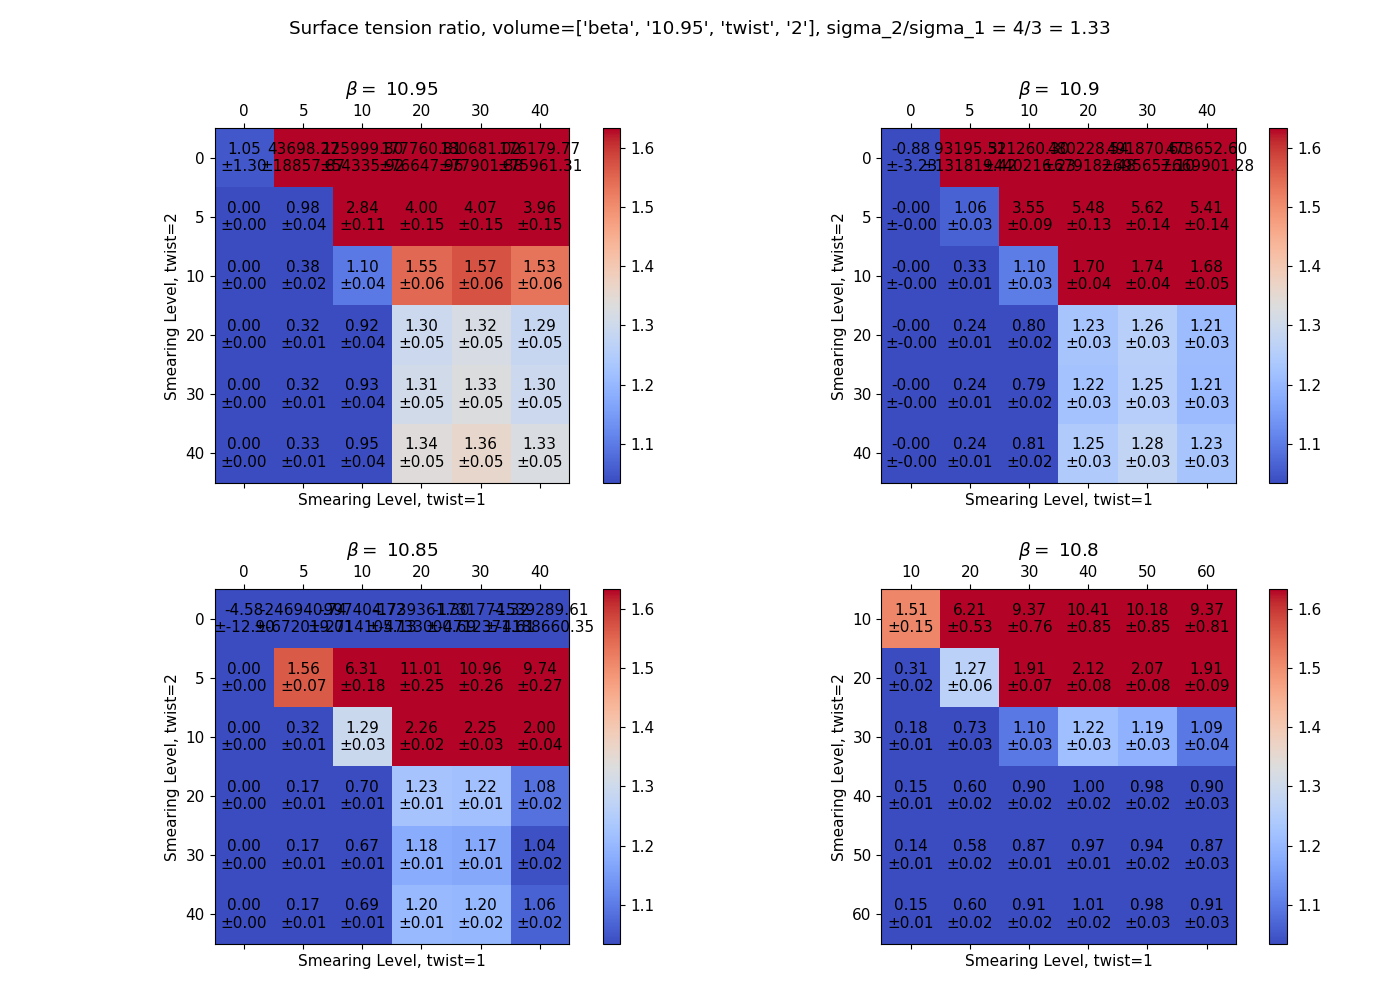

No such comm: 051b9ff949f34ab0b05689f1079e4a08


In [ ]:
%matplotlib widget

fourier_surface.surface_tension_ratios(surface_tensions_combined,'1','2')


['0', '5', '10', '20', '30', '40']
['0', '5', '10', '20', '30', '40']
['0', '5', '10', '20', '30', '40']
['0', '5', '10', '20', '30', '40']
['0', '5', '10', '20', '30', '40']
['0', '5', '10', '20', '30', '40']
['10', '20', '30', '40', '50', '60']
['10', '20', '30', '40', '50', '60']


/tmp/ipykernel_1010811/1573206237.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = [cm.get_cmap('winter', 100), cm.get_cmap('copper', 100),cm.get_cmap('viridis', 100), cm.get_cmap('plasma', 100)]


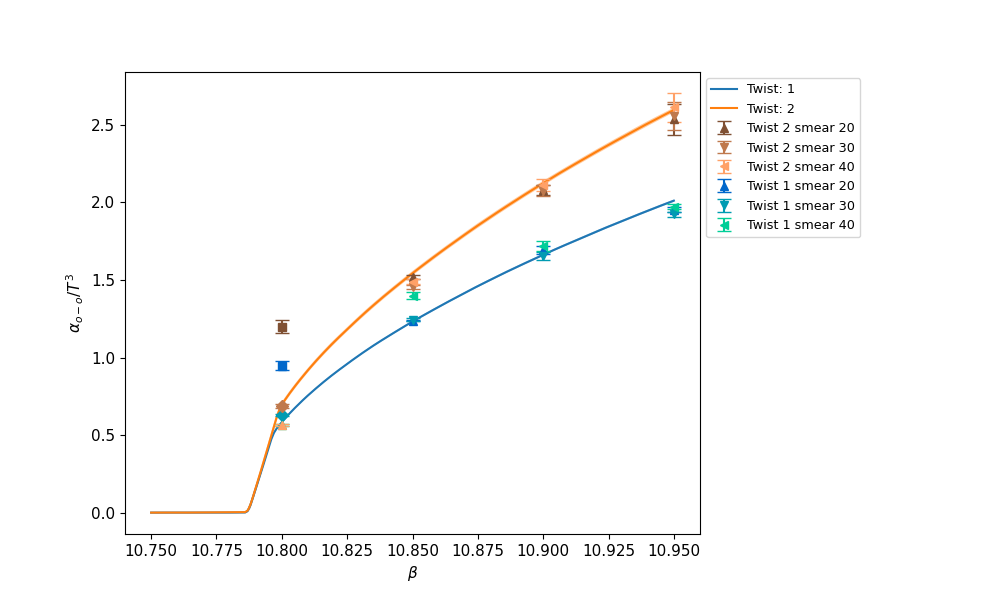

In [7]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib widget


data_4_0_l = read_and_write.read_reweight_data("../data/output-su4-reweighted/44_44_64_10.76-10.95_0_5.txt")
data_4_1_l = read_and_write.read_reweight_data("../data/output-su4-reweighted/44_44_64_10.76-10.95_1_5.txt")
data_4_2_l = read_and_write.read_reweight_data("../data/output-su4-reweighted/44_44_64_10.76-10.95_2_5.txt")
#reweight_0 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/32_32_48_10.75-10.85_0_5.txt")
#reweight_1 = read_and_write.read_reweight_data("../data/output-sun4-reweighted/32_32_48_10.75-10.85_1_5.txt")
listed = [(data_4_0_l,data_4_1_l,(44,44,64,6), 1),(data_4_0_l,data_4_2_l,(44,44,64,6),2)]
#listed = [(reweight_0,reweight_1,(32,32,48,6), 1)]
N = 20
x_volume = []
y_volume = []
y_volume_err = []
plt.figure(figsize=(10,6))
for (notwist,twist,dim,twist_coeff) in listed:
    integrated_ys = []
    for (y_notwist,y_twist) in zip(notwist[1],twist[1]):
        x=notwist[0]
        y = y_twist-y_notwist
        y_int = integrate.cumtrapz(y,x,initial=0)
        integrated_ys.append(y_int)
    y_mean = np.mean(integrated_ys,axis=0)
    errors= np.zeros(len(notwist[0]))
    for block in integrated_ys:
        errors += (block - y_mean)**2
    errors = np.sqrt((N-1)/N*errors)
    volume=dim[0]*dim[1]*dim[2]*dim[3]

    plt.plot(x,volume*6*dim[3]**2/(dim[0]*dim[1])*y_mean,label=f"Twist: {twist_coeff}")
    plt.fill_between(x,volume*6*dim[3]**2/(dim[0]*dim[1])*(y_mean-errors),volume*6*dim[3]**2/(dim[0]*dim[1])*(y_mean+errors),alpha=0.4)

colormap = [cm.get_cmap('winter', 100), cm.get_cmap('copper', 100),cm.get_cmap('viridis', 100), cm.get_cmap('plasma', 100)]
surface_tensions_subset = {k: surface_tensions_combined[k] for k in list(surface_tensions_combined.keys())}
twist_legend_added = set()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
wanted_smearing = ["20","30","40"]
for key, values in surface_tensions_subset.items():
    beta_value = float(key.split("-")[1])
    twist = int(key.split("-")[3])
    y_values = [val[0] for val in values['linear']]
    y_errors = [val[1] for val in values['linear']]
    smears = values['smearing']
    print(smears)
    for i, (smear, y_value, y_error) in enumerate(zip(smears, y_values, y_errors)):
        if smear not in wanted_smearing:
            continue
        marker = markers[i % len(markers)]
        color = colormap[int(twist)-1](int(smear)*2)
        if (twist,smear) not in twist_legend_added:
            plt.errorbar(beta_value, y_value, yerr=y_error, fmt=marker, color=color, label=f'Twist {twist} smear {smear}', capsize=5)
            twist_legend_added.add((twist,smear))
        else:
            plt.errorbar(beta_value, y_value, yerr=y_error, fmt=marker, color=color, capsize=5)

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha_{o-o}/T^3$')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.7)
plt.savefig("integral.svg")


In [6]:
plt.close('all')